# Loading useful packages

In [ ]:
# network analysis package
import networkx as nx
# package for drawing
import matplotlib.pyplot as plt
%matplotlib inline
# package for numerical analyses
import numpy as np
# useful tools for iterating and counting:
import itertools as it
from collections import Counter

### First tests with the configuration model

In [ ]:
# generate a degree sequence for given N and gamma
N = 10000
gamma = 2.7
degree_sequence = np.random.zipf(gamma,N)

# check if sum is even
if sum(degree_sequence)%2:
  print ("The degree sequence cannot be connected, because their sum is not even: ",sum(degree_sequence))
else:
  print ("Very good, the degree sequence is even and could maybe be connected: ",sum(degree_sequence))


Very good, the degree sequence is even and could maybe be connected:  15946


In [ ]:
# use the configuration model to connect the degree sequence:
G = nx.configuration_model(degree_sequence)

In [ ]:
# check if the graph contains selfloops:
nsl = nx.number_of_selfloops(G)
print("The graph contains",nsl,"selfloops")

The graph contains 4 selfloops


In [ ]:
# check in the graph contains multi-links:
multi_M = G.number_of_edges()
# easy function for converting the default multi-graph into a simple graph:
simple_G = nx.Graph(G)
# now we can count the edges and compare them
simple_M = simple_G.number_of_edges()
if simple_M == multi_M:
    print ("the graph does not contain multiple links")
elif simple_M < multi_M:
  print ("the graph contains",multi_M-simple_M,"multiple links")
else:
  print ("something is wrong")



the graph contains 7 multiple links


## Degrees

In [ ]:
# get all the degrees of all nodes:
degs = dict(nx.degree(G))
# convert the degrees to a list and extract mean and std:
l_k = list(degs.values())
mean_k = np.mean(l_k)
std_k = np.std(l_k)
min_k = min(l_k)
max_k = max(l_k)
print('The degrees range from',min_k,"to",max_k)
print('The average degree is', mean_k)
print('with a standard deviation of',std_k)

The degrees range from 1 to 129
The average degree is 1.5946
with a standard deviation of 2.8388467447187073


### Plotting different versions of the degree distribution

Plot the raw counts

<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:18: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-3372361909.py:18: SyntaxWarning: invalid escape sequence '\g'
  plt.loglog(degrees,powerlaw,'r-',label = '$k^{-\gamma}$')


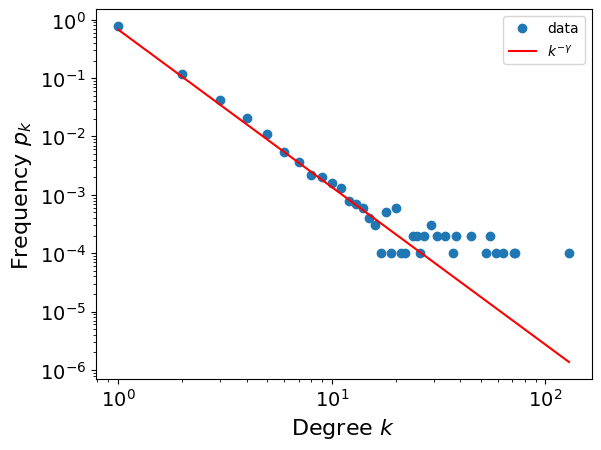

In [ ]:
# extract number of times all degrees occur in the degree sequence:
pk = Counter(degree_sequence)
# gest sorted degrees and corresponding number of nodes in separate lists
degrees = sorted(pk.keys())
number_of_nodes = [pk[_] for _ in degrees]

# convert to frequencies:
frequency = np.array(number_of_nodes)/N

# prepare theory points to match frequency of lowest degree
powerlaw = np.power(1.*np.array(degrees),-gamma)
# normalize power law to fit somehwere in the middle
norm = frequency[5]/powerlaw[5]
powerlaw *= norm

# plot both
plt.loglog(degrees,frequency,'o',label = 'data')
plt.loglog(degrees,powerlaw,'r-',label = '$k^{-\gamma}$')

# make the plot prettier
plt.xlabel('Degree $k$',fontsize = 16)
plt.ylabel('Frequency $p_k$',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()


Plot the cumulative counts

<>:21: SyntaxWarning: invalid escape sequence '\g'
<>:21: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-2137100175.py:21: SyntaxWarning: invalid escape sequence '\g'
  plt.loglog(degrees,powerlaw,'r-',label = '$k^{-\gamma+1}$')


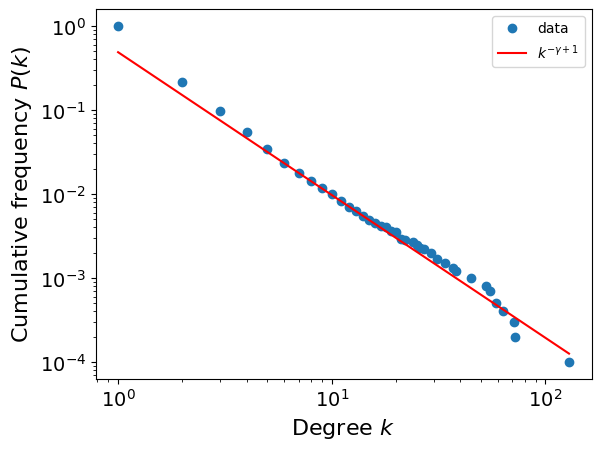

In [ ]:
# extract number of times all degrees occur in the degree sequence:
pk = Counter(degree_sequence)
# gest sorted degrees and corresponding number of nodes in separate lists
degrees = sorted(pk.keys())
number_of_nodes = [pk[_] for _ in degrees]

# compute cumulative numbers
cum_number_of_nodes = np.cumsum(number_of_nodes[::-1])[::-1]

# convert to frequencies:
cum_number_of_nodes = cum_number_of_nodes/N

# prepare theory points
powerlaw = np.power(1.*np.array(degrees),-gamma+1)
# normalize power law to fit somehwere in the middle
norm = cum_number_of_nodes[5]/powerlaw[5]
powerlaw *= norm


plt.loglog(degrees,cum_number_of_nodes,'o',label = 'data')
plt.loglog(degrees,powerlaw,'r-',label = '$k^{-\gamma+1}$')

# make the plot prettier
plt.xlabel('Degree $k$',fontsize = 16)
plt.ylabel('Cumulative frequency $P(k)$',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

Plot linearly binned counts

<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-2183963057.py:17: SyntaxWarning: invalid escape sequence '\g'
  plt.loglog(bin_centers,powerlaw,'r-',label='$k^{-\gamma}$')


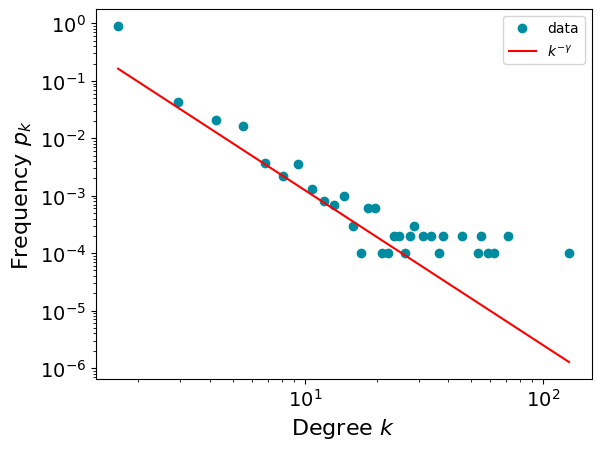

In [ ]:
# prepare bins and compute number of nodes with a degree in a particular bin:
bins = np.linspace(1, max(degree_sequence), 100)
counts,bin_edges = np.histogram(degree_sequence,bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

# compute frequencies:
counts = counts / N

# prepare theory points
powerlaw = np.power(bin_centers,-gamma)
# normalize power law to fit somehwere in the middle
norm = counts[5]/powerlaw[5]
powerlaw *= norm

# plot data and theory
plt.loglog(bin_centers,counts, 'o', c='#008CA0',label = 'data')
plt.loglog(bin_centers,powerlaw,'r-',label='$k^{-\gamma}$')

# make the plot prettier
plt.xlabel('Degree $k$',fontsize = 16)
plt.ylabel('Frequency $p_k$',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

Plot log binned counts

<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-395875666.py:17: SyntaxWarning: invalid escape sequence '\g'
  plt.loglog(bin_centers,powerlaw,'r-',label='$k^{-\gamma}$')


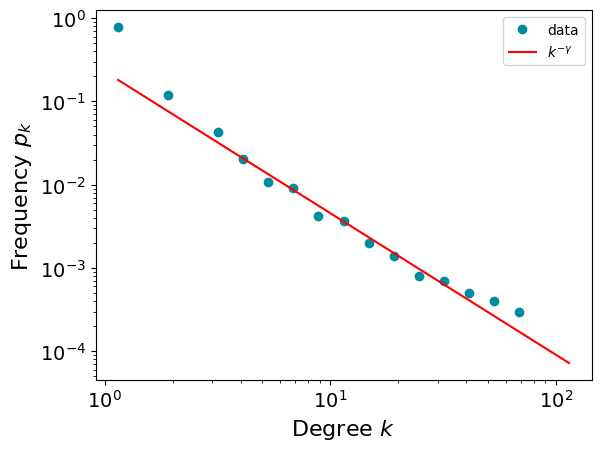

In [ ]:
# prepare bins and compute number of nodes with a degree in a particular bin:
bins = np.logspace(0.0, np.log10(max(degree_sequence)), 20)
counts,bin_edges = np.histogram(degree_sequence,bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

# compute frequencies:
counts = counts / N

# prepare theory points
powerlaw = np.power(bin_centers,-gamma+1)
# normalize power law to fit somehwere in the middle
norm = counts[5]/powerlaw[5]
powerlaw *= norm

# plot data and theory
plt.loglog(bin_centers,counts, 'o', c='#008CA0',label = 'data')
plt.loglog(bin_centers,powerlaw,'r-',label='$k^{-\gamma}$')

# make the plot prettier
plt.xlabel('Degree $k$',fontsize = 16)
plt.ylabel('Frequency $p_k$',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

## Experimenting a bit more with the configuration model

Scaling of the largest degree

Experiment: kmax=17.7 +- 10.1 
Theory: kmax=19.5


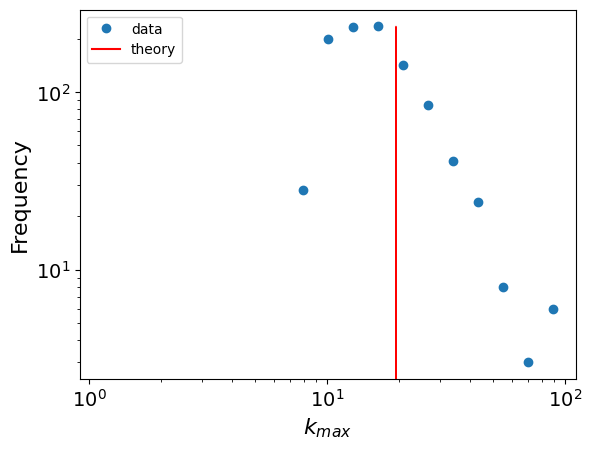

In [ ]:
# Testing the size of the biggest hub:

N = 10000
gamma = 4.1

all_kmax = []
for i in range(1000):
  # generate a degree sequence for given N and gamma
  degree_sequence = np.random.zipf(gamma,N)
  kmax = max(degree_sequence)
  all_kmax.append(kmax)

mean_kmax = np.mean(all_kmax)
std_kmax  = np.std(all_kmax)

# compare with the theory
kmax_theory = np.power(N,1./(gamma-1.))

print("Experiment: kmax=%1.1f +- %1.1f \nTheory: kmax=%1.1f" %(mean_kmax,std_kmax,kmax_theory))

# Plot the distribution of kmax
bins = np.logspace(0.0, np.log10(max(all_kmax)), 20)
counts,bin_edges = np.histogram(all_kmax,bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.loglog(bin_centers,counts,'o',label = 'data')

# plot an arrow of the prediction by the theory:
plt.arrow(kmax_theory, min(counts), 0, max(counts),color='r')
plt.plot([], [], 'r-', label="theory")

# make the plot prettier
plt.xlabel("$k_{max}$",fontsize = 16)
plt.ylabel('Frequency',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left')
plt.show()

Number of self loops and multiple links as a function of network size

In [ ]:
# generate a degree sequence for given N and gamma
gamma = 2.2

# go through a couple of log-spaced network sizes:
for n in np.logspace(3,6,10):

  # convert to the nearest integer
  N = int(n)

  # check if I got an even number of stubs
  degree_sequence = np.random.zipf(gamma,N)

  # check if sum is even, if not draw another sequence
  number_of_attempts = 1
  while sum(degree_sequence)%2:
    number_of_attempts += 1
    degree_sequence = np.random.zipf(gamma,N)

  #print ("Took me",number_of_attempts,"attempt to generate a degree sequence with even sum")

  # use the configuration model to connect the degree sequence:
  G = nx.configuration_model(degree_sequence)

  # count selfloops:
  nsl = nx.number_of_selfloops(G)

  # count multi-links:
  multi_M = G.number_of_edges()
  # easy function for converting the default multi-graph into a simple graph:
  simple_G = nx.Graph(G)
  simple_M = simple_G.number_of_edges()
  number_of_multi_links = multi_M-simple_M

  # print results
  #print ("Network contains",number_of_multi_links,"multiple links and",nsl,"self loops")
  print ("N=%i, g=%.1f: %.1f%% of all edges are multiple links; %.1f%% are self links" % (N,gamma,number_of_multi_links*100./multi_M,nsl*100./multi_M))


N=1000, g=2.2: 5.4% of all edges are multiple links; 0.9% are self links
N=2154, g=2.2: 3.6% of all edges are multiple links; 0.6% are self links
N=4641, g=2.2: 3.0% of all edges are multiple links; 0.3% are self links
N=10000, g=2.2: 5.9% of all edges are multiple links; 0.6% are self links
N=21544, g=2.2: 6.2% of all edges are multiple links; 0.4% are self links
N=46415, g=2.2: 13.1% of all edges are multiple links; 1.6% are self links
N=100000, g=2.2: 6.8% of all edges are multiple links; 0.2% are self links
N=215443, g=2.2: 4.8% of all edges are multiple links; 0.2% are self links
N=464158, g=2.2: 1.8% of all edges are multiple links; 0.0% are self links
N=1000000, g=2.2: 3.0% of all edges are multiple links; 0.0% are self links


### Number of self loops and multiple links as a function of gamma

In [ ]:
# generate a degree sequence for given N and gamma
N = 5000

# go through a couple of log-spaced network sizes:
for gamma in np.linspace(1.9,4,10):

  # check if I got an even number of stubs
  degree_sequence = np.random.zipf(gamma,N)

  # check if sum is even, if not draw another sequence
  number_of_attempts = 1
  while sum(degree_sequence)%2:
    number_of_attempts += 1
    degree_sequence = np.random.zipf(gamma,N)

  #print ("Took me",number_of_attempts,"attempt to generate a degree sequence with even sum")

  # use the configuration model to connect the degree sequence:
  G = nx.configuration_model(degree_sequence)

  # count selfloops:
  nsl = nx.number_of_selfloops(G)

  # count multi-links:
  multi_M = G.number_of_edges()
  # easy function for converting the default multi-graph into a simple graph:
  simple_G = nx.Graph(G)
  simple_M = simple_G.number_of_edges()
  number_of_multi_links = multi_M-simple_M

  # print results
  #print ("Network contains",number_of_multi_links,"multiple links and",nsl,"self loops")
  print ("N=%i, g=%.1f: %.1f%% of all edges are multiple links; %.1f%% are self links" % (N,gamma,number_of_multi_links*100./multi_M,nsl*100./multi_M))


N=5000, g=1.9: 65.1% of all edges are multiple links; 6.5% are self links
N=5000, g=2.1: 6.8% of all edges are multiple links; 0.6% are self links
N=5000, g=2.4: 1.2% of all edges are multiple links; 0.1% are self links
N=5000, g=2.6: 2.2% of all edges are multiple links; 0.5% are self links
N=5000, g=2.8: 0.0% of all edges are multiple links; 0.0% are self links
N=5000, g=3.1: 0.0% of all edges are multiple links; 0.1% are self links
N=5000, g=3.3: 0.0% of all edges are multiple links; 0.0% are self links
N=5000, g=3.5: 0.0% of all edges are multiple links; 0.0% are self links
N=5000, g=3.8: 0.0% of all edges are multiple links; 0.0% are self links
N=5000, g=4.0: 0.0% of all edges are multiple links; 0.0% are self links
